Original and Processed Text Sample:
                                              twitts  \
0  is bored and wants to watch a movie  any sugge...   
1           back in miami.  waiting to unboard ship    
2  @misskpey awwww dnt dis brng bak memoriessss, ...   
3                  ughhh i am so tired  blahhhhhhhhh   
4  @mandagoforth me bad! It's funny though. Zacha...   

                                   lemmatized_twitts  
0                  bored want watch movie suggestion  
1                            miami wait unboard ship  
2  misskpey awwww dnt bring memoriessss thnk I m ...  
3                           ughhh tired blahhhhhhhhh  
4  mandagoforth bad funny zachary quinto reply sy...  

Engineered Features Sample:
   word_count  stopword_count  hashtag_count  mention_count  sentiment
0          10               5              0              0          0
1           7               3              0              0          0
2          12               1              0           

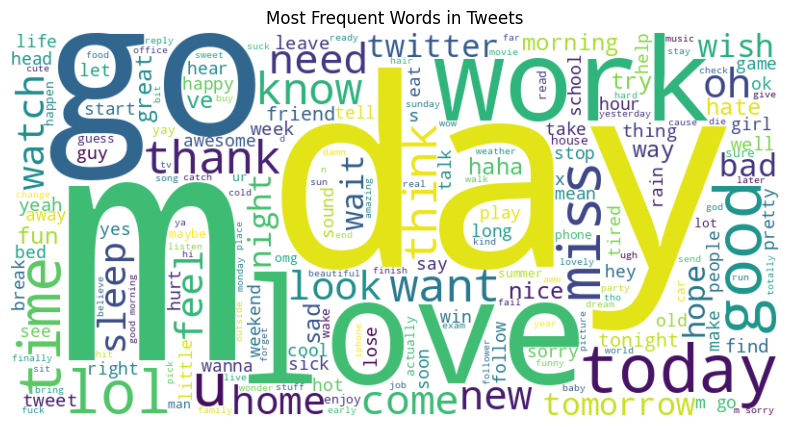

In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import spacy
import re
import unicodedata
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup

# 2. Load Data
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding='latin1')

# 3. Basic Feature Engineering
df['word_count'] = df['twitts'].apply(lambda s: len(str(s).split()))
df['char_count'] = df['twitts'].apply(lambda s: len(str(s).replace(" ", "")))
df['average_word_length'] = df['char_count'] / df['word_count']
df['stopword_count'] = df['twitts'].apply(lambda s: len([word for word in str(s).lower().split() if word in stopwords]))
df['hashtag_count'] = df['twitts'].apply(lambda s: len([word for word in str(s).split() if word.startswith('#')]))
df['mention_count'] = df['twitts'].apply(lambda s: len([word for word in str(s).split() if word.startswith('@')]))
df['numeric_count'] = df['twitts'].apply(lambda s: len([word for word in str(s).split() if word.isdigit()]))
df['uppercase_count'] = df['twitts'].apply(lambda s: len([word for word in str(s).split() if word.isupper()]))

# 4. Text Preprocessing
df['cleaned_twitts'] = df['twitts'].astype(str)
df['cleaned_twitts'] = df['cleaned_twitts'].apply(lambda s: s.lower())

contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "'cause": "because", "could've": "could have", "couldn't": "could not",
    "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will",
    "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
    "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have",
    "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
    "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is", "i'll": "I will", "i'd": "I would",
    "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
    "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not",
    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have",
    "there's": "there is", "they'd": "they would", "they'd've": "they would have",
    "they'll": "they will", "they'll've": "they will have", "they're": "they are",
    "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
    "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
    "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
    "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "dis": "this", "bak": "back", "brng": "bring"
}

def expand_contractions(text):
    for key, value in contractions_dict.items():
        text = re.sub(re.escape(key), value, text)
    return text

df['cleaned_twitts'] = df['cleaned_twitts'].apply(expand_contractions)
df['cleaned_twitts'] = df['cleaned_twitts'].apply(lambda s: BeautifulSoup(s, 'lxml').get_text().strip())
df['cleaned_twitts'] = df['cleaned_twitts'].apply(lambda s: unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
df['cleaned_twitts'] = df['cleaned_twitts'].apply(lambda s: re.sub(r'[^a-zA-Z0-9\s]', '', s))
df['cleaned_twitts'] = df['cleaned_twitts'].apply(lambda s: ' '.join(s.split()))

# 5. Advanced NLP Processing
nlp = spacy.load('en_core_web_sm')
df['twitts_no_stopwords'] = df['cleaned_twitts'].apply(lambda s: ' '.join([word for word in s.split() if word not in stopwords]))

def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc]
    return ' '.join(lemmas)

df['lemmatized_twitts'] = df['twitts_no_stopwords'].apply(lemmatize_text)

# 6. Final Data Review and Visualization
print("Original and Processed Text Sample:")
print(df[['twitts', 'lemmatized_twitts']].head())

print("\nEngineered Features Sample:")
print(df[['word_count', 'stopword_count', 'hashtag_count', 'mention_count', 'sentiment']].head())

# 7. Generate Word Cloud
full_text = ' '.join(df['lemmatized_twitts'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()